<a href="https://colab.research.google.com/github/Aarunimaa/Personal-Projects/blob/main/Fuel_Efficiency_Prediction_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perofrming Regression  with Feedforward Neural Network (FNN)**

In this project, I have used a simple dataset auto-mpg (which I have used many times in classworks and assignments related to our course work in R software), so that I would be familiar with the datatypes and the other features of the variables. This is an attempt to understand FNN (a variant of DNN) at a very basic level.

FNNs, also known as multilayer perceptrons (MLPs), are capable of effectively handling regression problems where the goal is to predict continuous output values. FNNs can learn complex relationships between the input variables and the target variable, making them versatile for a wide range of regression tasks, including single-output and multi-output regression.

FNNs are designed to process data in a feedforward manner, where information flows from the input layer through one or more hidden layers before reaching the output layer. This structure enables FNNs to learn intricate patterns and capture non-linear relationships within the data, thereby making them well-suited for modeling complex regression problems with high-dimensional input data.

## **Importing Required Packages**

In [2]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 714.7 kB/s eta 0:00:00


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from category_encoders import TargetEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

## **Getting the Data**

In [24]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
names = ["mpg", "cylinders", "displacement", "horsepower", "weight","acceleration", "model year", "origin", "car name"]
widths = [7, 4, 10, 10, 11, 7, 4, 4, 30]

# Get the data
df_full = pd.read_fwf(url, names=names, widths=widths, na_values=['?'])
df = df_full.copy()
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


### **Segreggating Feature and Target Variables**

In [25]:
target=df['mpg']
target.head(10)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

In [6]:
feature=df.drop(['mpg'], axis=1)
feature.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


### **Train Test Split**

We do the splitting before proceeding with with data preprocessing because, if scaling, imputation, or other data preprocessing is applied to the entire dataset (including the testing data) before the train-test split, it can lead to leakage. (Data leakage occurs when information from outside the training dataset is used to create a machine learning model, leading to overly optimistic performance estimates during training and potentially causing the model to perform poorly on unseen data.)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size=0.8, random_state=10)

## **Pair Wise Scatterplot**

In [97]:
col=x_train.columns.tolist()
col.append("mpg")

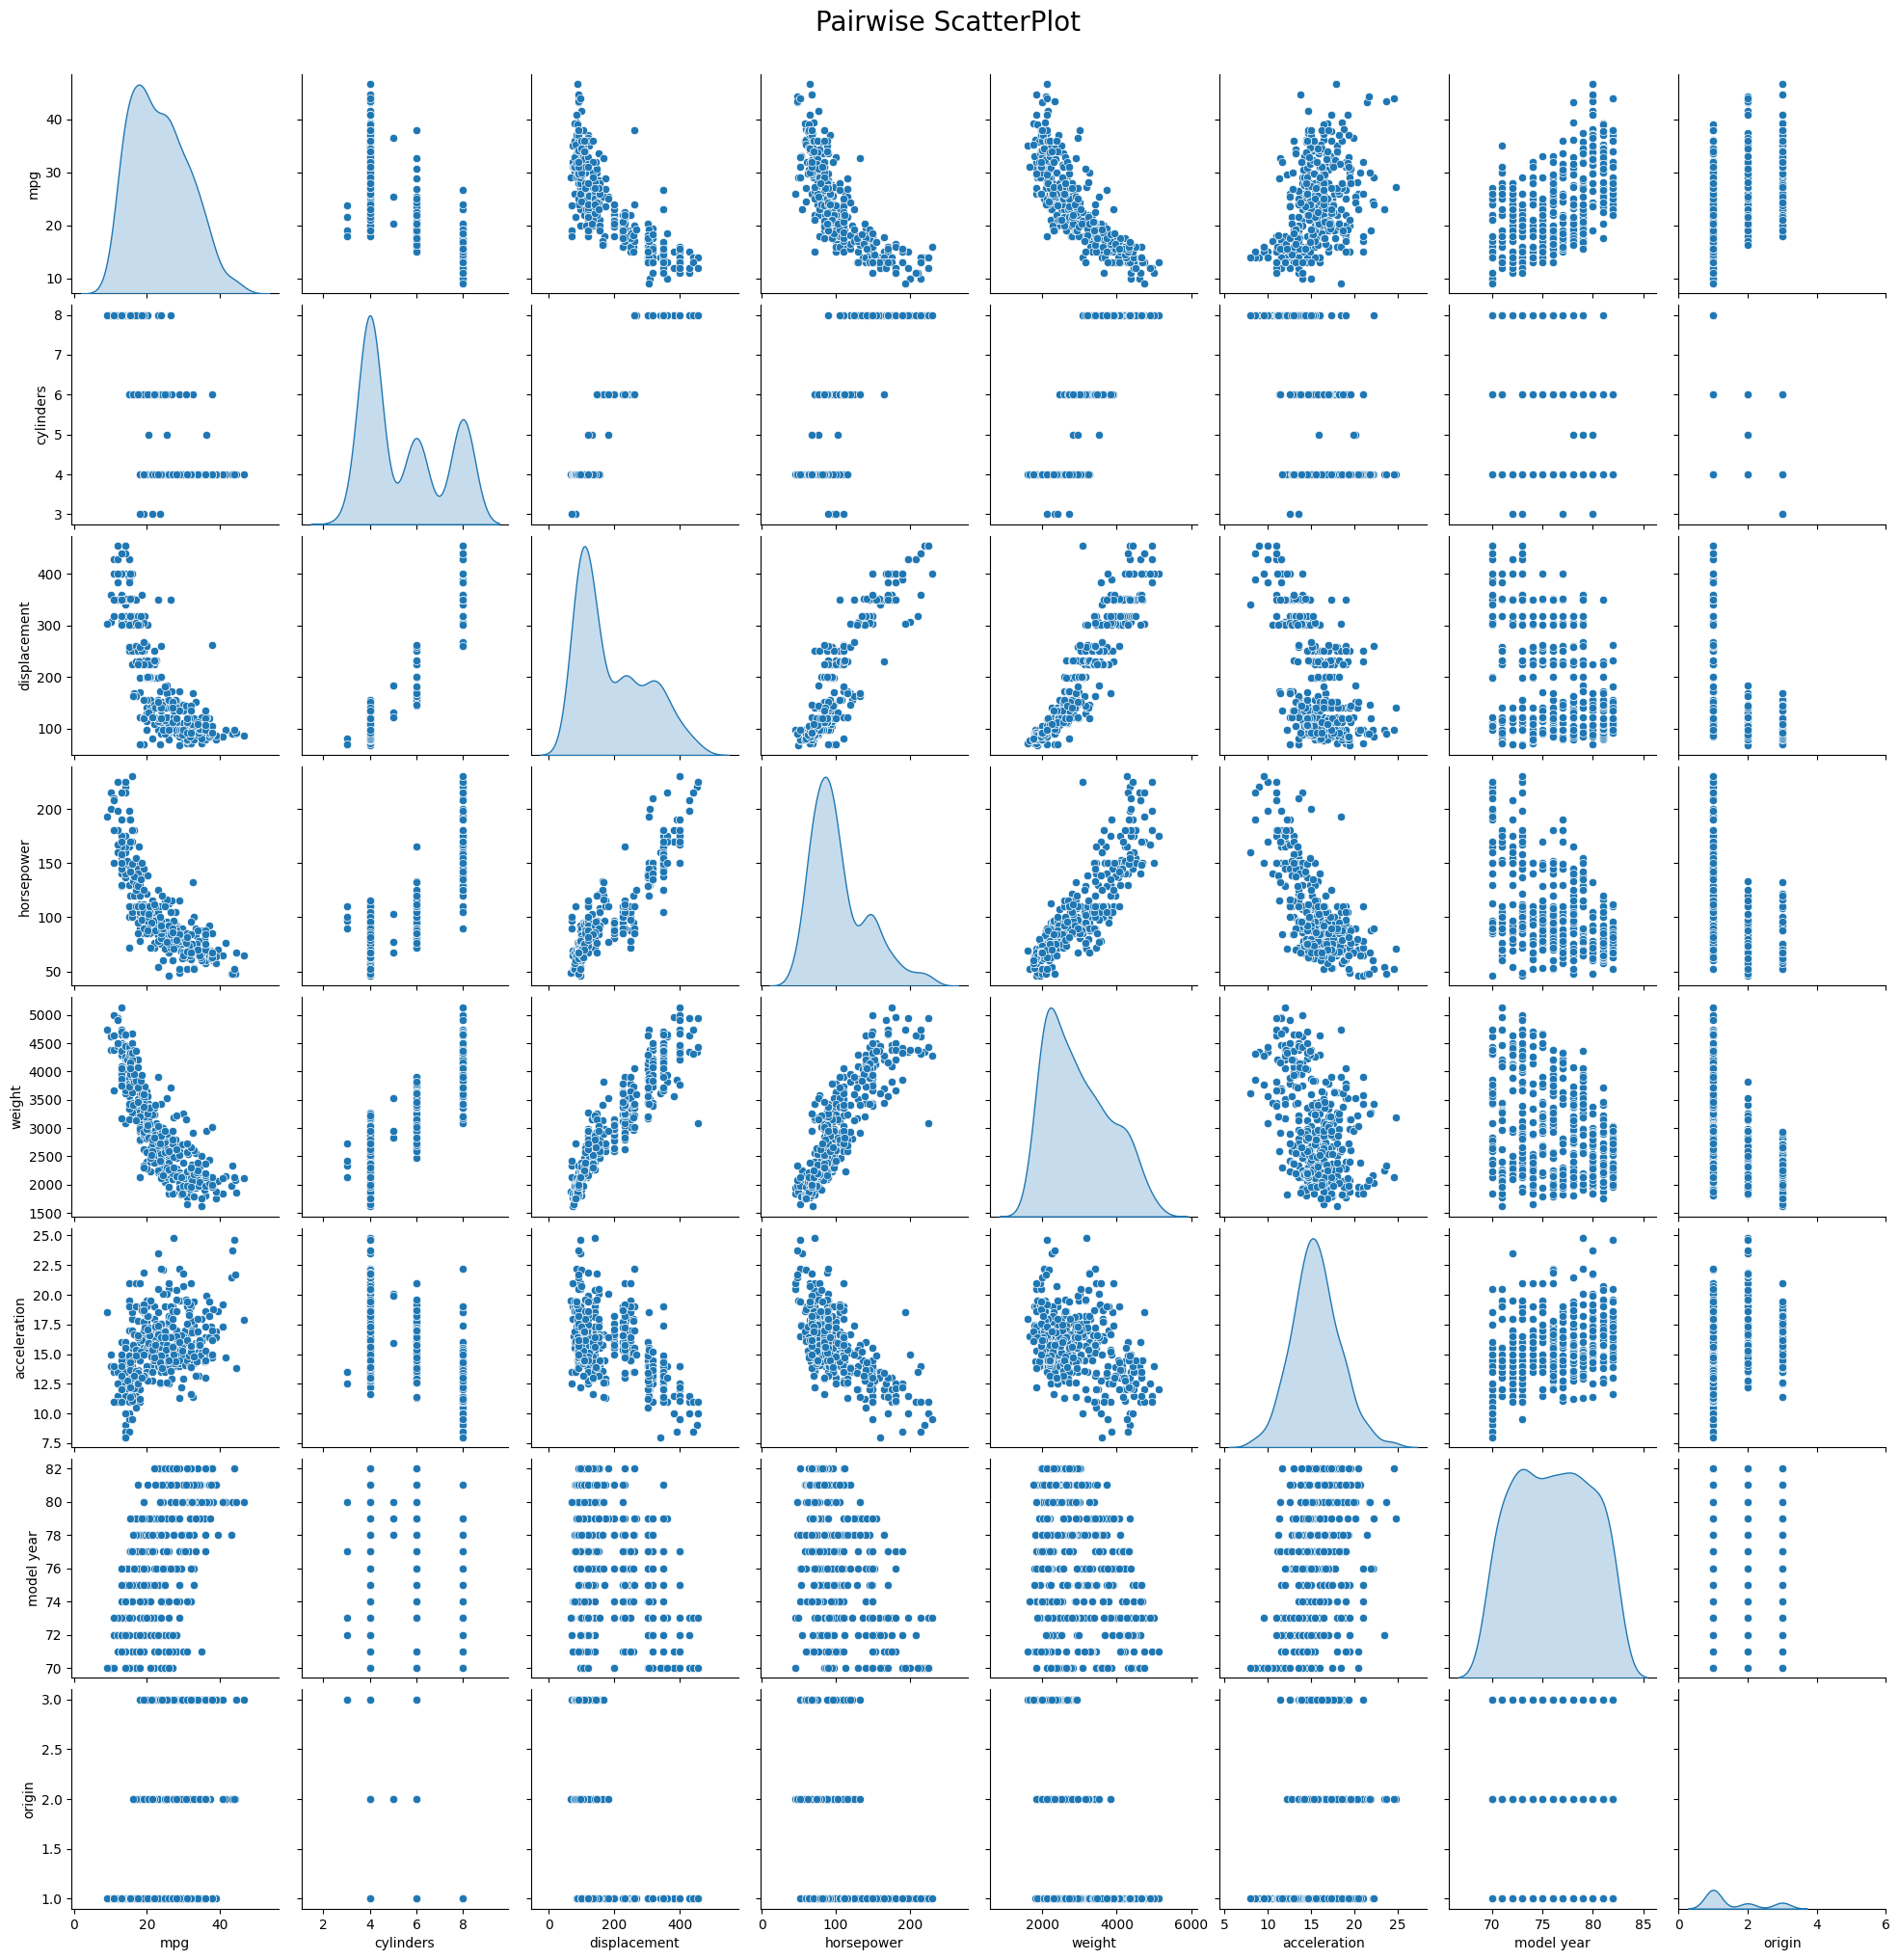

In [103]:
columns=df.columns.tolist()
g = sns.pairplot(df[columns], diag_kind='kde')
g.fig.suptitle('Pairwise ScatterPlot', y=1.02, fontsize=20)
plt.axis([0, 6, 0, 12])

plt.show()

We can see that mpg is non linearly related to the numerical features. Hence, we will first perform multiple linear regression and then FNN to show how using non-linearity in the model improves the performance.

## **Data Cleaning**

### **Checking Missing Values**

In [27]:
print(x_train.isna().sum())
print(x_test.isna().sum())

cylinders       0
displacement    0
horsepower      4
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


**We can see that Horsepower has 6 missing values. We will fill the missing values using the forward fill method, which will assign the most recent non-null value to the missing value cell.**

In [28]:
x_train['horsepower'].fillna(method='ffill', inplace=True)
print(x_train.isna().sum())

x_test['horsepower'].fillna(method='ffill', inplace=True)
print(x_test.isna().sum())

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


**All the missing values have been removed.**

### **Checking the datatype of each column**

In [10]:
x_train.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

We see that car name is object datatype. Hence, we will only extract the company name and then do target encoding on it.

## **Feature Engineering**

### **Creating a new column of company names based on the "car name" column**

In [30]:
# Create a new feature named Company for training set
x_train['company'] = x_train['car name'].str.split().str.get(0).str.strip('"')
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,company
303,4,85.0,65.0,2020.0,19.2,79,3,"""datsun 210""",datsun
347,4,85.0,65.0,1975.0,19.4,81,3,"""datsun 210 mpg""",datsun
149,4,120.0,97.0,2489.0,15.0,74,3,"""honda civic""",honda
100,6,250.0,88.0,3021.0,16.5,73,1,"""ford maverick""",ford
175,4,90.0,70.0,1937.0,14.0,75,2,"""volkswagen rabbit""",volkswagen


In [29]:
# Create a new feature named Company for test set
x_test['company'] = x_test['car name'].str.split().str.get(0).str.strip('"')
x_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,company
331,4,97.0,67.0,2145.0,18.0,80,3,"""subaru dl""",subaru
111,3,70.0,90.0,2124.0,13.5,73,3,"""maxda rx3""",maxda
350,4,105.0,63.0,2215.0,14.9,81,1,"""plymouth horizon 4""",plymouth
205,4,97.0,75.0,2155.0,16.4,76,3,"""toyota corolla""",toyota
56,4,91.0,70.0,1955.0,20.5,71,1,"""plymouth cricket""",plymouth


### **Target Encoding "company" column**

We select ***Target encoding over One-Hot encoding*** because **"company" column has high cardinality** (many unique values) and **one-hot encoding can significantly increase the dimensionality of your dataset**, especially when dealing with categorical features with high cardinality. This can lead to a sparse matrix, making the dataset **computationally expensive** to work with and potentially causing issues like the **curse of dimensionality**. Target encoding reduces dimensionality by mapping categories to a single numerical value. Also, **one-hot encoding creates binary columns** (0 or 1) for each category, which can **lead to a loss of information**. **Target encoding retains the original** order or **ranking** of the categories and uses this information to create meaningful encoded values.

In [31]:
encoder = TargetEncoder()

# Fit and transform the training data to perform target encoding
x_train["company_encoded"] = encoder.fit_transform(x_train[["company"]], y_train)

# Transform the testing data using the same encoder
x_test["company_encoded"] = encoder.transform(x_test[["company"]])

To prevent data leakage, we do not use the testing datset target here to target encode the features of the testing dataset. The same encoder must be used.

In [14]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,company,company_encoded
303,4,85.0,65.0,2020.0,19.2,79,3,"""datsun 210""",datsun,27.503896
347,4,85.0,65.0,1975.0,19.4,81,3,"""datsun 210 mpg""",datsun,27.503896
149,4,120.0,97.0,2489.0,15.0,74,3,"""honda civic""",honda,26.321261
100,6,250.0,88.0,3021.0,16.5,73,1,"""ford maverick""",ford,20.561611
175,4,90.0,70.0,1937.0,14.0,75,2,"""volkswagen rabbit""",volkswagen,25.159804


### **Eliminating features that we do not want in the Feature subset**

We will only keep the numeric variables and eliminate the object type variables, i.e, 'car name' and 'company'.

In [32]:
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "company_encoded"]
x_train_final=x_train[features]
x_test_final=x_test[features]

### **Normalizing the Feature Variables**

In [33]:
sc=StandardScaler()

x_train_std=sc.fit_transform(x_train_final)
x_train_std=pd.DataFrame(x_train_std, columns=x_train_final.columns)

x_train_std.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company_encoded
0,-0.839481,-1.038801,-1.005135,-1.129758,1.282248,0.799031,1.786513,2.061887
1,-0.839481,-1.038801,-1.005135,-1.182677,1.353396,1.343125,1.786513,2.061887
2,-0.839481,-0.704619,-0.177137,-0.578225,-0.211881,-0.561204,1.786513,1.508174
3,0.339128,0.536628,-0.410012,0.047394,0.321737,-0.833251,-0.710679,-1.188509
4,-0.839481,-0.991061,-0.875760,-1.227364,-0.567626,-0.289157,0.537917,0.964377


In [34]:
x_test_std=sc.fit_transform(x_test_final)
x_test_std=pd.DataFrame(x_test_std, columns=x_test_final.columns)

x_test_std.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company_encoded
0,-0.925770,-0.933378,-1.041605,-0.949796,1.011281,1.119105,1.762401,0.511425
1,-1.513561,-1.198793,-0.440993,-0.975218,-0.779477,-0.746070,1.762401,0.870579
2,-0.925770,-0.854736,-1.146060,-0.865056,-0.222353,1.385559,-0.733034,-0.246333
3,-0.925770,-0.933378,-0.832697,-0.937690,0.374567,0.053291,1.762401,1.445676
4,-0.925770,-0.992359,-0.963265,-1.179804,2.006147,-1.278977,-0.733034,-0.246333


We need to normalize all the feature variables, so that one does not dominate the others.

## **Correlation Visualization between Response and Feature Variables**

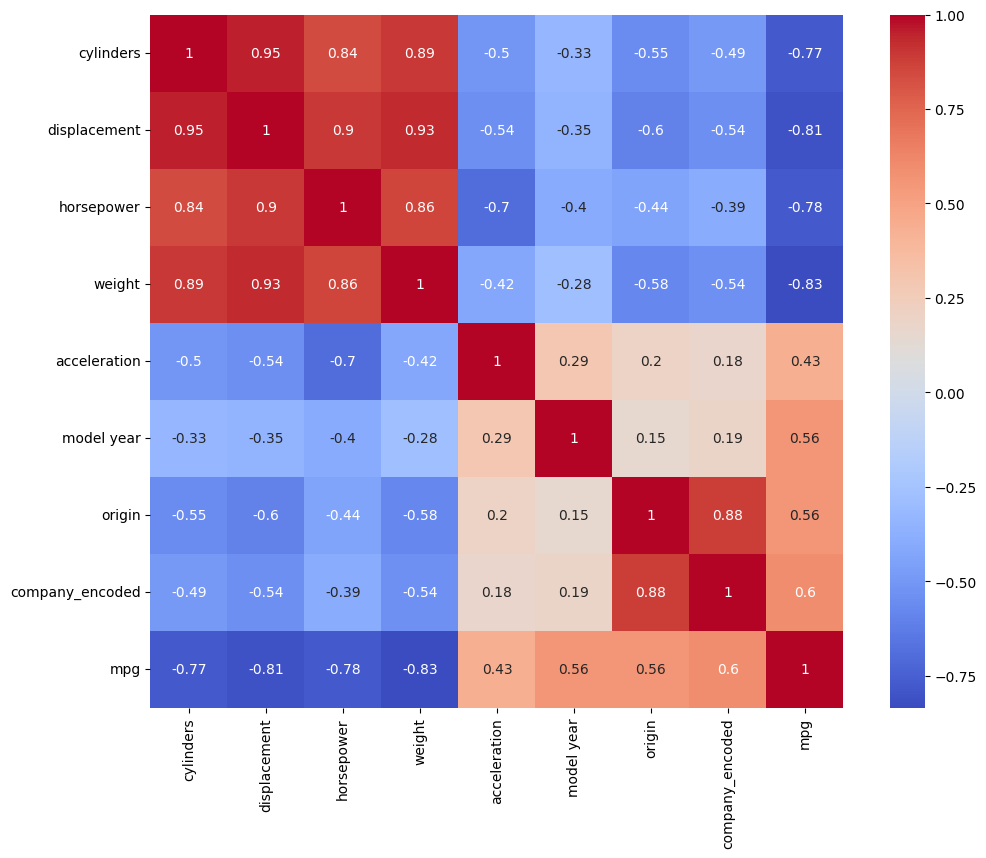

In [35]:
corr_df=pd.concat([x_train_final, y_train], axis=1)
corr_matrix = corr_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, annot=True, square=True, cmap="coolwarm")
plt.show()

There is a high correlation among cylinders, displacement, horsepower and weight, indicating multicollinearity. So, we will need to keep only one among the afore mentioned variables to prevent inflated standard errors and unreliable coefficient estimates for the individual variables, reduced predictive power, and inaccurate inference about the individual predictors

## **Feature Selection using LASSO**

**LASSO**(Least Absolute Shrinkage and Selection Operator)  regression includes a penalty term that **shrinks some of the coefficients to zero**, effectively performing feature selection and reducing the model complexity. LASSO can help in dealing with multicollinearity and overfitting issues.

### **Performing LASSO**

In [36]:
lasso = Lasso(alpha=0.1)  # higher alpha value will shrink more coefficients to zero, performing more aggressive feature selection
lasso.fit(x_train_std, y_train)

Lasso(alpha=0.1)

In [37]:
coefficients = lasso.coef_
best_predictors = x_train_std.columns[coefficients != 0]
print("Best predictors selected by LASSO:", best_predictors)

Best predictors selected by LASSO: Index(['horsepower', 'weight', 'acceleration', 'model year', 'origin',
       'company_encoded'],
      dtype='object')


Thus, two of the four highly correlated feature variables have been omitted by LASSO to ensure a robust and stable model.

### **Selecting the final Features**

In [93]:
features = ["horsepower", "weight", "acceleration", "model year", "origin", "company_encoded"]
x_train_lasso=x_train_std[features]
x_test_final=x_test_std[features]

## **Multiple Linear Regression**

In [39]:
# Create and train the model
model = LinearRegression()
model.fit(x_train_lasso, y_train)

# Make predictions
y_pred = model.predict(x_test_final)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13.142765570939536
R^2 Score: 0.7850909016967541


The $R^2$ value shows that our model provides a pretty decent fit.

## **Regression with a feedforward neural network (FNN)**

### **Building the Model**

This model will contain a few more layers than the regular linear regression model that we have done before in basic statistics:

1. The first layer with an input shape for a multiple-input model(all finally selected features will be expected by the neural network for each sample in the training data.

2. Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.

3. A linear Dense single-output layer.

In [41]:
def build_model():
    # Sequential model creation
    model = keras.Sequential([

        # First hidden layer with 64 units and ReLU activation function
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(x_train_lasso.keys())]),

        # Second hidden layer with 64 units and ReLU activation function
        layers.Dense(64, activation=tf.nn.relu),

        # Output layer with a single unit, specifying regression problem
        layers.Dense(units=1)
    ])

    # Define the optimizer for the model
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    # Compile the model with loss function, optimizer, and metrics
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])

    # Return the built model
    return model

**Note to Self:**

ReLU, which stands for Rectified Linear Unit, is an activation function commonly used in neural networks. It is defined as follows:

**f(x)=max(0,x)**

In other words, ReLU returns 0 for any negative input value and returns the input value itself for any non-negative input value. It sparsely activates neurons and introduces non-linearity to the model.

The absence of an activation function in the output layer implies the use of a linear activation. This choice allows the model to predict unbounded continuous real values, and indicates that this is a regression problem.

For binary classification, where there are two classes, the output layer will usually have 1 unit with a sigmoid activation function. The sigmoid function ensures that the output is a probability between 0 and 1, representing the likelihood of the sample belonging to one of the classes.

For multiclass classification, where there are more than two exclusive classes, the output layer will have units equal to the number of classes, often with a softmax activation function. Softmax normalizes the outputs into a probability distribution over the multiple classes, ensuring that the predicted probabilities sum to 1.

In [42]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Testing on a small sample**

We take a batch of 10 examples from the training data and call model.predict() on it to check if our model is working.

In [43]:
example_batch = x_train_lasso[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 245ms/step


array([[-0.20589198],
       [-0.1783461 ],
       [-0.23299652],
       [-0.01126896],
       [-0.165967  ],
       [-0.08442543],
       [-0.01084661],
       [ 0.03353913],
       [ 0.05175477],
       [ 0.08185963]], dtype=float32)

We can see that the model is giving the desired output in the form of a 2-D array, which we would need to flatten later for compatibility. Thus, we will now train our model using 1000 epochs(iterations), and record the training and validation accuracy in the history object.

### **Training the Model**

In [44]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')  # to print 100 dots in each line; 10 such lines are created
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  x_train_lasso, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

### **Visualizing the training progress**

We visualize the training progress using the statistics in the history object.

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,601.712708,23.256357,601.712708,555.948914,22.285254,555.948914,0
1,559.559570,22.341864,559.559570,515.327759,21.363335,515.327759,1
2,517.722778,21.404169,517.722778,469.906189,20.311726,469.906189,2
3,470.135040,20.305975,470.135040,418.740997,19.073692,418.740997,3
4,417.332977,19.029604,417.332977,363.831238,17.664913,363.831238,4


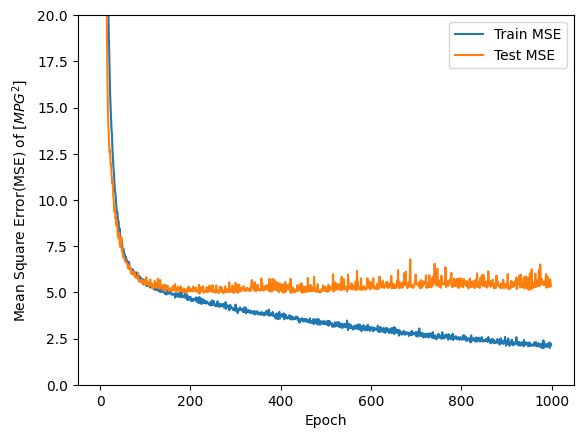

In [46]:
plt.figure()
plt.plot(hist['epoch'], hist['mean_squared_error'],
         label='Train MSE')
plt.plot(hist['epoch'], hist['val_mean_squared_error'],
         label = 'Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error(MSE) of [$MPG^2$]')
plt.ylim([0,20])
plt.legend()
plt.show()

We can clearly see that at some point around 100 epochs, the training MSE and the test MSE **intersect each other**, from where the test MSE only increases. Thus, we will use **Early Stopping** to prevent test MSE from increasing, thereby stopping the model training at exactly the epoch value at the intersection og the two MSEs.  

In the Early Stopping technique, if a set amount of epochs elapses without showing improvement in the test MSE, then it will automatically stop the training.

### **Early Stopping**

In [56]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train_lasso, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



....................................................................................................
.............................................

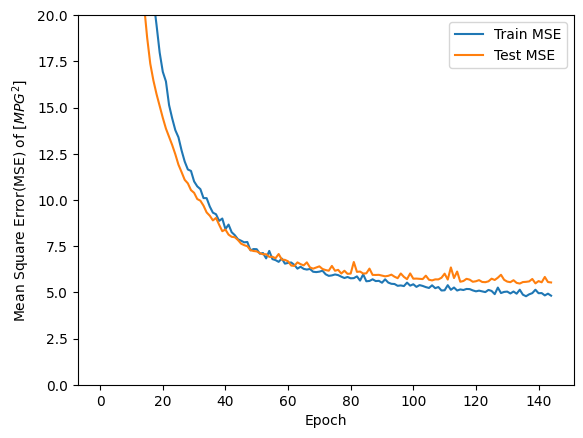

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

plt.figure()
plt.plot(hist['epoch'], hist['mean_squared_error'],
         label='Train MSE')
plt.plot(hist['epoch'], hist['val_mean_squared_error'],
         label = 'Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error(MSE) of [$MPG^2$]')
plt.ylim([0,20])
plt.legend()
plt.show()

Thus, the model stops training by itself after a bit more than 140 epochs, since there is no significant improvement(i.e, we would always want the test MSE to be lower than the training MSE to avoid overfitting) in the test MSE.

## **Testing Model Performance**

### **Predicting the Values of MPG**

In [49]:
y_pred=model.predict(x_test_final)

3/3 [==============================] - 0s 3ms/step


In [50]:
print(y_test.shape)
print(y_pred.shape)

(80,)
(80, 1)


In [51]:
y_pred=y_pred.flatten()

### **Plotting the Predicted Values vs the True MPG Values**

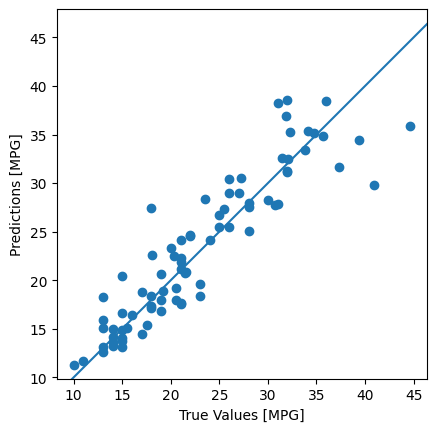

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

The above graph shows a good fit.

### **Plotting a histogram with density curve of the errors**

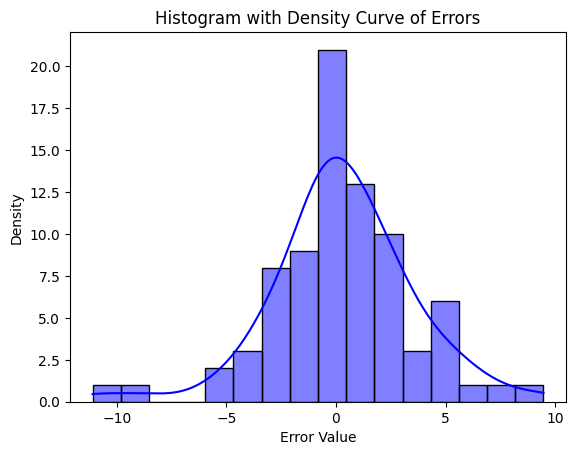

In [59]:
error = y_pred - y_test
sns.histplot(error, kde=True, color='blue')
plt.title('Histogram with Density Curve of Errors')
plt.xlabel('Error Value')
plt.ylabel('Density')
plt.show()

We can see that the errors well belong to a normal distribution with mean around 0. Thus, the predictions by our model are good.

In [54]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.8313571508820499


***Thus, from the $R^2$ values we can conclude that the DNN model provides a better fit over our Multiple Linear Regression model and predicts the mpg values quite well.***